Alokasi Kendaraan: {'Pusat Kota': [12, 7], 'Pinggiran': [6, 3], 'Suburban': [10, 5]}

=== Jadwal Transportasi Publik ===

Zona: Pusat Kota
  06:00-09:00: Setiap 5.0 menit
  16:00-19:00: Setiap 8.6 menit

Zona: Pinggiran
  06:00-09:00: Setiap 10.0 menit
  16:00-19:00: Setiap 20.0 menit

Zona: Suburban
  06:00-09:00: Setiap 6.0 menit
  16:00-19:00: Setiap 12.0 menit


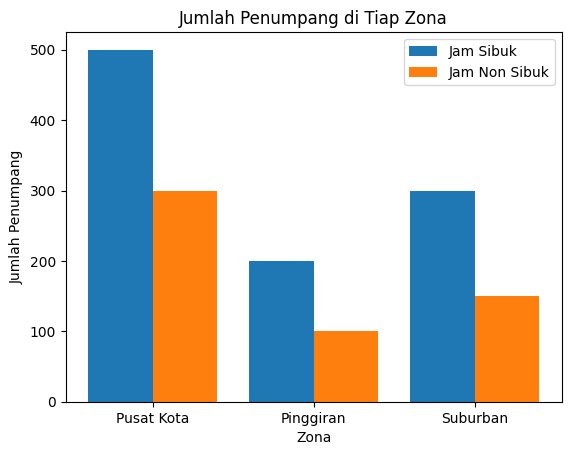

In [ ]:
# Simulasi Divide and Conquer untuk Penjadwalan Transportasi Publik
import numpy as np
import matplotlib.pyplot as plt

# Data simulasi
zona = ['Pusat Kota', 'Pinggiran', 'Suburban']
jam_sibuk = ['06:00-09:00', '16:00-19:00']
jam_non_sibuk = ['09:00-16:00', '19:00-23:00']
jumlah_penumpang = {
    'Pusat Kota': [500, 300],  # [Jam Sibuk, Jam Non Sibuk]
    'Pinggiran': [200, 100],
    'Suburban': [300, 150]
}
jumlah_kendaraan = {
    'Pusat Kota': 20,
    'Pinggiran': 10,
    'Suburban': 15
}



def bagi_zona(jumlah_penumpang, jumlah_kendaraan):
    zona_data = {}
    for z, penumpang in jumlah_penumpang.items():
        alokasi_kendaraan = [
            int((p / sum(penumpang)) * jumlah_kendaraan[z]) for p in penumpang
        ]
        zona_data[z] = alokasi_kendaraan
    return zona_data



def hitung_interval(alokasi_kendaraan, jam):
    interval = {
        zona: [round(60 / k, 1) if k > 0 else None for k in alokasi_kendaraan[zona]]
        for zona in alokasi_kendaraan
    }
    jadwal = {}
    for zona, intervals in interval.items():
        jadwal[zona] = {
            jam[i]: f"Setiap {intervals[i]} menit" if intervals[i] else "Tidak beroperasi"
            for i in range(len(intervals))
        }
    return jadwal


def gabungkan_jadwal(jadwal):
    print("\n=== Jadwal Transportasi Publik ===")
    for zona, jadwal_zona in jadwal.items():
        print(f"\nZona: {zona}")
        for jam, interval in jadwal_zona.items():
            print(f"  {jam}: {interval}")

# (Divide)
alokasi_kendaraan = bagi_zona(jumlah_penumpang, jumlah_kendaraan)
print("Alokasi Kendaraan:", alokasi_kendaraan)

# (Conquer)
jadwal_transportasi = hitung_interval(alokasi_kendaraan, jam_sibuk + jam_non_sibuk)

# (Combine)
gabungkan_jadwal(jadwal_transportasi)

# Visualisasi Data
fig, ax = plt.subplots()
zona_names = list(jumlah_penumpang.keys())
jam = ['Jam Sibuk', 'Jam Non Sibuk']
data = np.array(list(jumlah_penumpang.values()))
x = np.arange(len(zona_names))

ax.bar(x - 0.2, data[:, 0], width=0.4, label='Jam Sibuk')
ax.bar(x + 0.2, data[:, 1], width=0.4, label='Jam Non Sibuk')
ax.set_xlabel('Zona')
ax.set_ylabel('Jumlah Penumpang')
ax.set_title('Jumlah Penumpang di Tiap Zona')
ax.set_xticks(x)
ax.set_xticklabels(zona_names)
ax.legend()

plt.show()
